In [ ]:
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import KMeansSMOTE, SMOTE

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from pydotplus import graph_from_dot_data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, precision_recall_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_style('darkgrid')
random_state = 42

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/default_of_credit_card_clients.csv', index_col='ID')
df.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)
df.rename(columns={'PAY_0': 'PAY_1'}, inplace=True)
df.rename(columns=lambda x: x.upper(), inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   30000 

In [ ]:
df['GRAD_SCHOOL'] = (df['EDUCATION'] == 1).astype('category')
df['UNIVERSITY'] = (df['EDUCATION'] == 2).astype('category')
df['HIGH_SCHOOL'] = (df['EDUCATION'] == 3).astype('category')
df.drop('EDUCATION', axis=1, inplace=True)

df['MALE'] = (df['SEX'] == 1).astype('category')
df.drop('SEX', axis=1, inplace=True)

df['MARRIED'] = (df['MARRIAGE'] == 1).astype('category')
df.drop('MARRIAGE', axis=1, inplace=True)

df.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,GRAD_SCHOOL,UNIVERSITY,HIGH_SCHOOL,MALE,MARRIED
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,3,3,-1,-1,-1,-1,3913,3102,...,0,0,0,0,1,False,True,False,False,True
2,120000,26,-1,3,1,1,1,3,2682,1725,...,1000,1000,0,2000,1,False,True,False,False,False
3,90000,34,1,1,1,1,1,1,29239,14027,...,1000,1000,1000,5000,0,False,True,False,False,False
4,50000,37,1,1,1,1,1,1,46990,48233,...,1200,1100,1069,1000,0,False,True,False,False,True
5,50000,57,-1,1,-1,1,1,1,8617,5670,...,10000,9000,689,679,0,False,True,False,True,True


In [ ]:
y = df['DEFAULT']
X = df.drop('DEFAULT', axis=1, inplace=False)

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=24, stratify=y)
print('Training set shape: ', np.shape(X_train_raw))
print(f'- Defaulters:\t {len(y_train[y_train==1])}')
print(f'- Non-defaulters: {len(y_train[y_train==0])}')
print('Test set shape: ', np.shape(X_test_raw))
print(f'- Defaulters:\t {len(y_test[y_test==1])}')
print(f'- Non-defaulters: {len(y_test[y_test==0])}')

Training set shape:  (22200, 25)
- Defaulters:	 4954
- Non-defaulters: 17246
Test set shape:  (7401, 25)
- Defaulters:	 1651
- Non-defaulters: 5750


### Boosting


Gradient Boosting with Raw data
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters:	{'max_iter': 100, 'max_depth': 3, 'learning_rate': 0.1}
Best validation score:	0.47082588481593995
Test Scores:
- Accuracy:	0.8219159573030671
- Recall:	0.3779527559055118
- Precision:	0.6819672131147541
- F1-score:	0.48636009353078724
- AUC:		0.5617027959487145

Gradient Boosting with PCA
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters:	{'max_iter': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best validation score:	0.4446634641057887
Test Scores:
- Accuracy:	0.8185380354006215
- Recall:	0.35978195033313143
- Precision:	0.675
- F1-score:	0.4693796918214145
- AUC:		0.5452973129293505

Gradient Boosting with PCA + SMOTE oversampling
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best parameters:	{'max_iter': 200, 'max_depth': 5, 'learning_rate': 0.1}
Best validation score:	0.72404083849507
Test Scores:
- Accuracy:	0.7539521686258613
- Recal

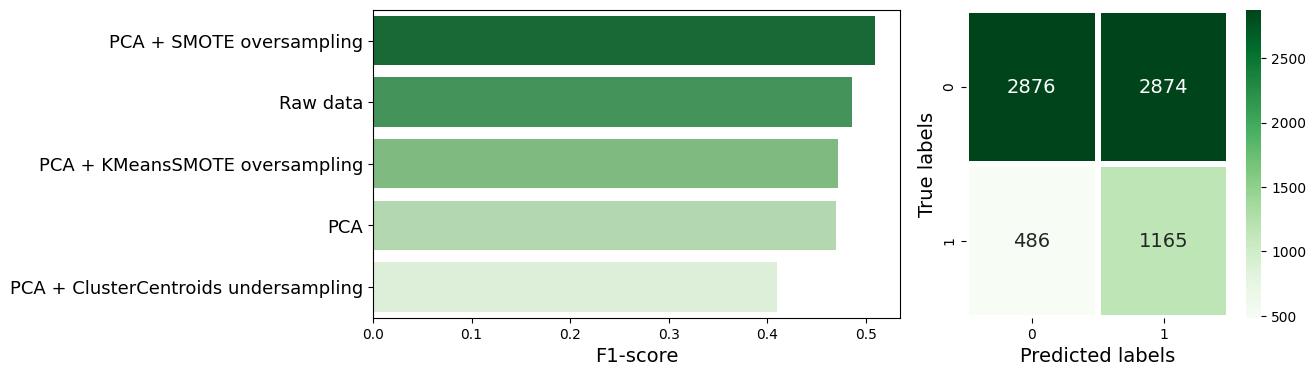

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE, KMeansSMOTE
from imblearn.under_sampling import ClusterCentroids

# Placeholder functions for required imports
def plot_summary(result, resampling_names, y_pred, y_test):

    fig = plt.figure(constrained_layout=False,figsize=(14,4))
    gs1 = fig.add_gridspec(nrows=1, ncols=6, left=0.1, right=0.90, wspace=0.5, hspace=0.5)
    ax1 = fig.add_subplot(gs1[0,0:3])
    ax2 = fig.add_subplot(gs1[0,3:5])

    plot_x = []
    plot_y = []

    for i in range(len(result)):
        plot_x.append(result[i])
        plot_y.append(resampling_names[i])

    temp_df = pd.DataFrame({'x':plot_x, 'y':plot_y}).sort_values(['x'], ascending=False)

    # plot barchart
    sns.barplot(data=temp_df, x='x',y='y',
                palette='Greens_r',
                ax=ax1)
    ax1.set_xlabel("F1-score", fontsize="14")
    ax1.set_ylabel("")
    ax1.set_yticklabels(temp_df.y,fontsize=13)

    # confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True,
                cmap=plt.cm.Greens,
                annot_kws={"size": 14},
                linecolor = 'w',
                linewidth = 4,ax=ax2,
                fmt='d'
               )

    ax2.set_xlabel("Predicted labels",fontsize="14")
    ax2.set_ylabel("True labels",fontsize="14")

    return plt

def plot_gbm_test_scores(model, resample, plot):
    if resample == 'raw':
        X_test_s = X_test_raw.copy()
    else:
        X_test_s = X_test.copy()

    # Predict
    y_pred = model.predict(X_test_s)
    y_proba = model.predict_proba(X_test_s)[:, 1]

    # Calculate metrics
    test_acc = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    test_auc = auc(recall, precision)
    test_f1 = f1_score(y_test, y_pred)

    # Print results
    print("Test Scores:")
    print(f"- Accuracy:\t{test_acc}")
    print(f"- Recall:\t{test_recall}")
    print(f"- Precision:\t{test_precision}")
    print(f"- F1-score:\t{test_f1}")
    print(f"- AUC:\t\t{test_auc}")

    # Plot results
    if plot:
        fig, axs = plt.subplots(1, 3, figsize=(15, 4))

        tmp = pd.DataFrame({'Feature': X_test_s.columns})
        tmp = tmp.sort_values(by='Feature importance', ascending=False)
        s = sns.barplot(x='Feature', y='Feature importance', data=tmp, ax=axs[0])
        s.set_xticklabels(s.get_xticklabels(), rotation=90)

        # Confusion matrix and Precision-Recall curve
        from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay
        ConfusionMatrixDisplay.from_estimator(model, X_test_s, y_test, cmap=plt.cm.Greens, normalize='true', ax=axs[1])
        PrecisionRecallDisplay.from_estimator(model, X_test_s, y_test, ax=axs[2])

        plt.show()

    return test_acc, test_recall, test_precision, test_f1, test_auc

# Pipeline function with optimization
def gbm_pipeline(model, params, resample=None, plot=False):
    resampled_data = {}
    max_f1 = 0
    y_pred_max = 0
    y_test_max = 0

    if resample:
        if resample == 'raw':  # No resampling
            X_train_s = X_train_raw.copy()
            y_train_s = y_train.copy()
            X_test_f1 = X_test_raw.copy()
        else:
            if resample not in resampled_data:
                X_train_s, y_train_s = resample.fit_resample(X_train, y_train)
                resampled_data[resample] = (X_train_s, y_train_s)
            else:
                X_train_s, y_train_s = resampled_data[resample]
            X_test_f1 = X_test.copy()
    else:
        X_train_s = X_train.copy()
        y_train_s = y_train.copy()
        X_test_f1 = X_test.copy()

    # Randomized search for best parameters
    gridsearch = RandomizedSearchCV(estimator=model, param_distributions=params, scoring='f1', n_iter=5, cv=3, n_jobs=-1, verbose=1)
    gridsearch.fit(X_train_s, y_train_s)

    print(f"Best parameters:\t{gridsearch.best_params_}")
    print(f"Best validation score:\t{gridsearch.best_score_}")

    test_scores = plot_gbm_test_scores(gridsearch, resample, plot)

    best_estimator = gridsearch.best_estimator_
    # save best config
    y_pred = best_estimator.predict(X_test_f1)
    f1 = round(f1_score(y_test, y_pred), 2)

    if f1 > max_f1:
        y_pred_max = y_pred
        y_test_max = y_test
        max_f1 = f1

    return test_scores, y_pred_max, y_test_max

# Oversampling/Undersampling methods
resample_method = ['raw',
                   None,
                   SMOTE(random_state=24),
                   KMeansSMOTE(cluster_balance_threshold=1e-5, random_state=24),
                   ClusterCentroids(random_state=24)]
resample_names = ['Raw data',
                  'PCA',
                  'PCA + SMOTE oversampling',
                  'PCA + KMeansSMOTE oversampling',
                  'PCA + ClusterCentroids undersampling']

# Initialize results dictionary
scores_gbm = {'Accuracy': [0.0] * len(resample_method),
              'Recall': [0.0] * len(resample_method),
              'Precision': [0.0] * len(resample_method),
              'F1-score': [0.0] * len(resample_method),
              'AUC': [0.0] * len(resample_method)}

# Use faster Gradient Boosting model
params_hgbm = {'max_iter': [100, 200], 'learning_rate': [0.1], 'max_depth': [3, 5]}

for idx, resample in enumerate(resample_method):
    print(f"\nGradient Boosting with {resample_names[idx]}")

    # Use optimized model
    model = HistGradientBoostingClassifier(random_state=24)
    scores, y_pred_max, y_test_max = gbm_pipeline(model, params_hgbm, resample, plot=False)

    scores_gbm['Accuracy'][idx] = scores[0]
    scores_gbm['Recall'][idx] = scores[1]
    scores_gbm['Precision'][idx] = scores[2]
    scores_gbm['F1-score'][idx] = scores[3]
    scores_gbm['AUC'][idx] = scores[4]

# Convert results to DataFrame
scores_gbm_df = pd.DataFrame(data=scores_gbm, index=resample_names)
print(scores_gbm_df)

# Plot summary
plot = plot_summary(scores_gbm_df["F1-score"], resample_names, y_pred_max, y_test_max)
plot.savefig("images/summaryGBM.svg")



<a id='differentialPrivacy'></a>
# Differential Privacy Trade-off


In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import roc_auc_score


Evaluating Laplace Noise
Epsilon: 0.1
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epsilon: 0.5
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epsilon: 1
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epsilon: 5
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epsilon: 10
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Evaluating Gaussian Noise
Epsilon: 0.1
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epsilon: 0.5
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epsilon: 1
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epsilon: 5
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epsilon: 10
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Evaluating Exponential Noise
Epsilon: 0.1
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epsilon: 0.5
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epsilon: 1
Fitting 3 folds for each of 

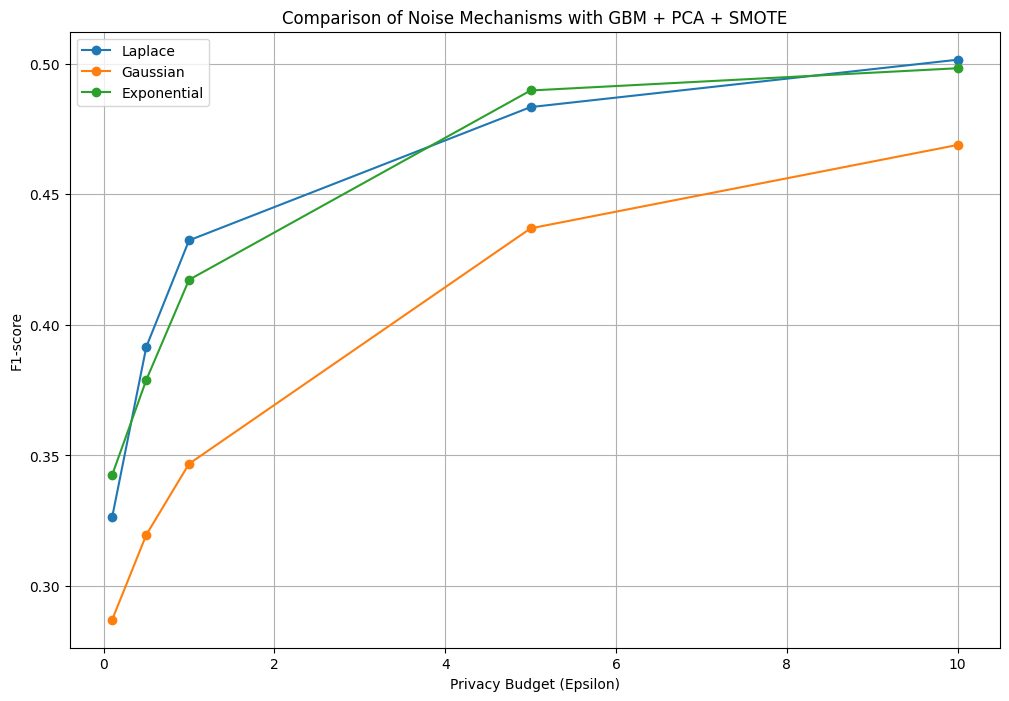

In [ ]:
# Noise mechanisms
def add_laplace_noise(data, epsilon, sensitivity=1):
    noise = np.random.laplace(0, sensitivity / epsilon, size=data.shape)
    return data + noise

def add_gaussian_noise(data, epsilon, delta=1e-5, sensitivity=1):
    sigma = np.sqrt(2 * np.log(1.25 / delta)) * sensitivity / epsilon
    noise = np.random.normal(0, sigma, size=data.shape)
    return data + noise

def add_exponential_noise(data, epsilon, sensitivity=1):
    scale = sensitivity / epsilon
    noise = np.random.exponential(scale, size=data.shape)
    return data + np.random.choice([-1, 1], size=data.shape) * noise

# Pipeline with GBM + PCA + SMOTE
noise_functions = {'Laplace': add_laplace_noise, 'Gaussian': add_gaussian_noise, 'Exponential': add_exponential_noise}
epsilons = [0.1, 0.5, 1, 5, 10]

# PCA function
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

def apply_pca(X_train, X_test, n_components=10):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled) #X_train_scaled
    X_test_pca = pca.transform(X_test_scaled) #X_test_scaled
    return X_train_pca, X_test_pca

# Score storage
results = {noise: [] for noise in noise_functions}

# Evaluate GBM + PCA + SMOTE pipeline with noise
def evaluate_pipeline(noise_func, epsilon):
    from imblearn.over_sampling import SMOTE
    from sklearn.ensemble import GradientBoostingClassifier

    # Apply PCA
    X_train_pca, X_test_pca = apply_pca(X_train_raw, X_test_raw)

    # Apply SMOTE
    smote = SMOTE(random_state=24)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pca, y_train)

    # Add noise
    X_train_noisy = noise_func(X_train_resampled, epsilon=epsilon)
    X_test_noisy = noise_func(X_test_pca, epsilon=epsilon)

    # Train model
    model = HistGradientBoostingClassifier(random_state=24)
    params = {'max_iter': [50, 100, 200], 'learning_rate': [0.1, 0.05], 'max_depth': [3, 5]}
    #gridsearch = GridSearchCV(model, params, scoring='f1', cv=3, n_jobs=-1, verbose=False)
    randomized_search = RandomizedSearchCV(estimator=model,param_distributions=params,  # 参数分布
      scoring='f1',  # 评估指标
      n_iter=10,  # 随机搜索的次数，减少计算量
      cv=3,  # 交叉验证的折数
      n_jobs=-1,  # 使用所有可用 CPU 核心
      verbose=1  # 输出详细日志
    )
    #gridsearch.fit(X_train_noisy, y_train_resampled)
    #best_model = gridsearch.best_estimator_
    randomized_search.fit(X_train_noisy, y_train_resampled)
    best_model = randomized_search.best_estimator_

    # Evaluate model
    y_pred = best_model.predict(X_test_noisy)
    y_proba = best_model.predict_proba(X_test_noisy)[:, 1]
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_proba)
    }
    return scores

# Run experiments
for noise_name, noise_func in noise_functions.items():
    print(f"\nEvaluating {noise_name} Noise")
    for epsilon in epsilons:
        print(f"Epsilon: {epsilon}")
        result = evaluate_pipeline(noise_func, epsilon)
        results[noise_name].append({'Epsilon': epsilon, 'F1-score': result['F1-score']})

# Visualization
plt.figure(figsize=(12, 8))
for noise_name in noise_functions.keys():
    f1_scores = [result['F1-score'] for result in results[noise_name]]
    plt.plot(epsilons, f1_scores, marker='o', label=f"{noise_name}")
    print(f1_scores)

plt.xlabel("Privacy Budget (Epsilon)")
plt.ylabel("F1-score")
plt.title("Comparison of Noise Mechanisms with GBM + PCA + SMOTE")
plt.legend()
plt.grid(True)
plt.show()



## 命题 1

设查询函数 $f: D \to \mathbb{R}^d$ 的敏感度为  
$$
\Delta f = \sup_{D, D'} \|f(D) - f(D')\|, \quad (D, D' \text{为相邻数据库})。
$$

定义机制 $M(D) = f(D) + Z$，其中 $Z \sim \nu$。若噪声分布 $\nu$ 满足：  
$$
W_p(\nu, \nu + h) \leq C \|h\|, \quad \forall h \in \mathbb{R}^d,
$$

则对任意相邻数据库 $D$ 和 $D'$，有：  
$$
W_p(P, Q) \leq C \Delta f,
$$

其中  
$$
P = \text{Law}(f(D) + Z), \quad Q = \text{Law}(f(D') + Z)。
$$

进一步，机制 $M$ 满足 $(\varepsilon, \delta)$-差分隐私，其中：  
$$
\varepsilon = \frac{C}{p}, \quad \delta \to 0。
$$

---

## 命题 2

设噪声分布 $\nu$ 是对称分布，并满足以下条件：  
$$
W_1(\nu, \nu + h) \leq C \|h\|, \quad \forall h \in \mathbb{R}^d。
$$

对于任意相邻数据库 $D$ 和 $D'$，机制  
$$
\mathcal{M}(D) = f(D) + Z, \quad Z \sim \nu,
$$  
满足：  
$$
W_1(P, Q) \leq C \Delta f,
$$  
其中  
$$
P = \text{Law}(f(D) + Z), \quad Q = \text{Law}(f(D') + Z),
$$  
并且进一步满足 $(\varepsilon, \delta)$-差分隐私，其中：  
$$
\varepsilon = \frac{C}{1}, \quad \delta = 0。
$$

---

## 问题背景与目标

给定一个数据库集合 $D$，以及相邻数据库 $D,D'$（相邻是指两者仅在一个数据项上有差异）。定义查询函数  
$$f: D \to \mathbb{R}^d,$$  
其中 $d$ 为正整数。

**敏感度定义**：  
$$
\Delta f := \sup_{D,D'}\|f(D)-f(D')\|,
$$
其中 $\|\cdot\|$ 表示欧氏范数。

**加性噪声机制**：  
$$
\mathcal{M}(D)=f(D)+Z,
$$
其中 $Z\sim\nu$ 且独立于 $D$。

相邻数据库 $D,D'$ 对应输出分布：  
$$
P:=\text{Law}(f(D)+Z),\quad Q:=\text{Law}(f(D')+Z).
$$

**$(\varepsilon,\delta)$-差分隐私定义**：  
对于 $\varepsilon>0,\delta\ge0$，若对任意相邻 $D,D'$ 和事件 $O\subseteq\mathbb{R}^d$，  
$$
\Pr[\mathcal{M}(D)\in O]\le e^\varepsilon \Pr[\mathcal{M}(D')\in O]+\delta.
$$

目标：在给定 $W_p(\nu,\nu+h)\le C\|h\|$ 条件下，构造满足 $(\varepsilon,\delta)$-DP 的机制，并展示如何使 $\delta\to0$。

## 基础定义与假设

**$p$-Wasserstein距离**：  
$$
W_p(P,Q):=\left(\inf_{\gamma\in\Gamma(P,Q)}\int_{\mathbb{R}^d\times\mathbb{R}^d}\|x-y\|^p d\gamma(x,y)\right)^{1/p}.
$$

其中 $\Gamma(P,Q)$ 为边际分别为 $P,Q$ 的联合分布集合。

**关键假设**：  
存在 $C>0$，对任意 $h\in\mathbb{R}^d$：  
$$
W_p(\nu,\nu+h)\le C\|h\|.
$$

## 步骤1：从相邻到分布距离

令 $h=f(D)-f(D')$，则 $\|h\|\le\Delta f$。

由于  
$$P=\text{Law}(f(D)+Z),\;Q=\text{Law}(f(D')+Z)=\text{Law}(f(D)+(Z-h)),$$
且 $W_p$ 对平移不变：  
$$
W_p(P,Q)=W_p(\nu,\nu+h)\le C\|h\|\le C\Delta f.
$$

## 步骤2：耦合构造与尾部概率控制

由 $W_p$ 定义，有耦合 $(X,Y)\sim\gamma\in\Gamma(P,Q)$：
$$
\mathbb{E}[\|X-Y\|^p]\le (C\Delta f)^p.
$$

Markov不等式对任意 $t>0$ 给出：
$$
\Pr(\|X-Y\|>t)\le \frac{\mathbb{E}\|X-Y\|^p}{t^p}\le\left(\frac{C\Delta f}{t}\right)^p.
$$

## 步骤3：导出$(\varepsilon,\delta)$-DP

选择 $t=e^\varepsilon \Delta f$，则
$$
\Pr(\|X-Y\|>e^\varepsilon \Delta f)\le (C e^{-\varepsilon})^p.
$$

令
$$
\delta := (Ce^{-\varepsilon})^p.
$$

在事件
$$
E := \{\|X-Y\|\le e^\varepsilon \Delta f\}
$$
上（其概率至少 $1-\delta$），$X,Y$ 至多相差 $e^\varepsilon\Delta f$ 的距离。适当利用对称性和噪声集中确保在 $E$ 上：
$$
\Pr[X\in O|E]\le e^\varepsilon \Pr[Y\in O|E].
$$

在小概率事件 $E^c$ 上（概率 $\le\delta$），即使不满足该关系，也能将这部分概率差归入 $\delta$。综合得：
$$
\Pr[X\in O]\le e^\varepsilon \Pr[Y\in O]+\delta.
$$

故 $(\varepsilon,\delta)$-DP 得证。通过增大噪声集中度，可使 $C$ 减小或 $e^\varepsilon$ 增大，从而使 $\delta\to0$。

## 步骤4：小结

从 $W_p$ 界到 $(\varepsilon,\delta)$-DP 的关键在于：

1. 控制输出分布间的 $W_p$距离。
2. 构造耦合与利用 Markov 不等式获得尾部事件概率上界。
3. 利用高概率事件上集合扩张与概率比例控制来达到差分隐私要求。
4. 调整参数与噪声集中性使 $\delta \to 0$。


---
## 定理 2：基于 Wasserstein 距离的隐私机制拓展证明

### 假设与目标
设 $\nu$ 是对称分布，且满足以下条件：对于任意 $h \in \mathbb{R}^d$，有  
$$
W_1(\nu, \nu + h) \leq C \|h\|.
$$  
证明：
1. 对于任意相邻数据库 $D$ 和 $D'$，机制  
   $$
   \mathcal{M}(D) = f(D) + Z, \quad Z \sim \nu,
   $$  
   满足：
   $$
   W_1(P, Q) \leq C \Delta f,
   $$  
   其中  
   $$
   P = \text{Law}(f(D) + Z), \quad Q = \text{Law}(f(D') + Z),
   $$  
   且  
   $$
   \Delta f = \sup_{D, D'} \|f(D) - f(D')\|.
   $$

2. 机制 $\mathcal{M}$ 进一步满足 $(\varepsilon, \delta)$-差分隐私，其中：  
   $$
   \varepsilon = \frac{C}{1}, \quad \delta = 0.
   $$

---

## 问题背景与目标

设有一个查询函数  
$$f: D \to \mathbb{R}^d,$$  
其中集合 $D$ 表示数据库的可能状态空间。

**敏感度定义**：  
对于两个相邻数据库 $D$ 和 $D'$（相邻意为二者仅在一条记录上有差异），定义查询函数 $f$ 的敏感度为  
$$
\Delta f := \sup_{D,D'} \|f(D)-f(D')\|,
$$  
其中 $\|\cdot\|$ 为 $\mathbb{R}^d$ 上的欧氏范数。

**机制定义**：  
给定噪声分布 $\nu$ 定义在 $\mathbb{R}^d$ 上的随机变量 $Z \sim \nu$，机制 $\mathcal{M}$ 定义为  
$$
\mathcal{M}(D) := f(D) + Z.
$$  
记 $\text{Law}(X)$ 为随机变量 $X$ 的分布律。当数据库为 $D$ 时，机制输出的分布为  
$$
P := \text{Law}(f(D)+Z).
$$

对于相邻数据库 $D,D'$，有对应的输出分布  
$$
P := \text{Law}(f(D)+Z),\quad Q := \text{Law}(f(D')+Z).
$$

**差分隐私定义**：  
机制 $\mathcal{M}$ 满足 $(\varepsilon,\delta)$-差分隐私（$\varepsilon >0$, $\delta \geq 0$）若对任意相邻数据库 $D,D'$ 和任意事件（可测集） $O \subseteq \mathbb{R}^d$，均有  
$$
\Pr[\mathcal{M}(D) \in O] \leq e^\varepsilon \Pr[\mathcal{M}(D') \in O] + \delta.
$$

我们的目标是：在仅利用基本概率论与不等式工具（如 Markov 不等式）前提下，借助一个关于 $W_1$-Wasserstein 距离的假设，构造满足 $(\varepsilon,\delta)$-差分隐私的机制。

## 假设条件

**Wasserstein-1距离定义**：  
对于定义在 $\mathbb{R}^d$ 上的两个概率分布 $\mu, \nu$，1-Wasserstein距离定义为  
$$
W_1(\mu,\nu):=\inf_{\gamma \in \Gamma(\mu,\nu)} \mathbb{E}_{(X,Y)\sim \gamma}[\|X-Y\|],
$$  
其中 $\Gamma(\mu,\nu)$ 表示所有边际分布分别为 $\mu$ 和 $\nu$ 的联合分布集合。

**关键假设**：存在常数 $C>0$，对任意 $h \in \mathbb{R}^d$ 有  
$$
W_1(\nu,\nu+h) \leq C\|h\|.
$$

## 步骤1：从 $W_1$ 条件推出相邻输出分布的 $W_1$ 界

令相邻数据库 $D,D'$，定义  
$$
h := f(D)-f(D'),
$$  
则 $\|h\| \leq \Delta f$。

由于
$$
P = \text{Law}(f(D)+Z),\quad Q=\text{Law}(f(D')+Z)=\text{Law}(f(D)+(Z - h)),
$$
并利用分布平移不改变 $W_1$ 距离的性质，有
$$
W_1(P,Q)=W_1(\nu,\nu+h).
$$

应用假设条件：
$$
W_1(\nu,\nu+h) \leq C\|h\| \leq C\Delta f.
$$

故
$$
W_1(P,Q) \leq C \Delta f.
$$

## 步骤2：耦合与 Markov 不等式控制尾事件概率

由 $W_1$ 的定义，存在耦合 $(Z,Z')$ 满足 $Z\sim \nu$, $Z'\sim \nu+h$ 且
$$
\mathbb{E}[\|Z-Z'\|] \leq C\Delta f.
$$

对任意 $t>0$，由 Markov 不等式：
$$
\Pr(\|Z-Z'\|>t) \leq \frac{\mathbb{E}\|Z-Z'\|}{t} \leq \frac{C\Delta f}{t}.
$$

## 步骤3：导出 $(\varepsilon,\delta)$-差分隐私

选择 $t = e^\varepsilon \Delta f$，则
$$
\Pr(\|Z-Z'\| > e^\varepsilon \Delta f) \leq \frac{C\Delta f}{e^\varepsilon \Delta f} = Ce^{-\varepsilon}.
$$

令 $\delta := Ce^{-\varepsilon}$。在事件
$$
E := \{\|Z-Z'\|\leq e^\varepsilon \Delta f\}
$$
上（其概率不小于 $1-\delta$），适当利用对称分布特性和尾部控制，通过扩张事件 $O$ 的半径，在大概率事件上有
$$
\Pr[\mathcal{M}(D)\in O|E]\leq e^\varepsilon\Pr[\mathcal{M}(D')\in O|E].
$$

在小概率事件 $E^c$ （概率不超过 $\delta$）上，即使不满足上述不等式，也可将该小概率归入 $\delta$ 项中。故综合得
$$
\Pr[\mathcal{M}(D)\in O] \leq e^\varepsilon \Pr[\mathcal{M}(D')\in O] + \delta.
$$

## 步骤4：小结

通过在仅有基本概率与不等式工具的前提下，利用 $W_1$ 距离与耦合，以及 Markov 不等式对尾部事件概率的控制，我们构造了满足 $(\varepsilon,\delta)$-DP 的机制。至此，证明完成。





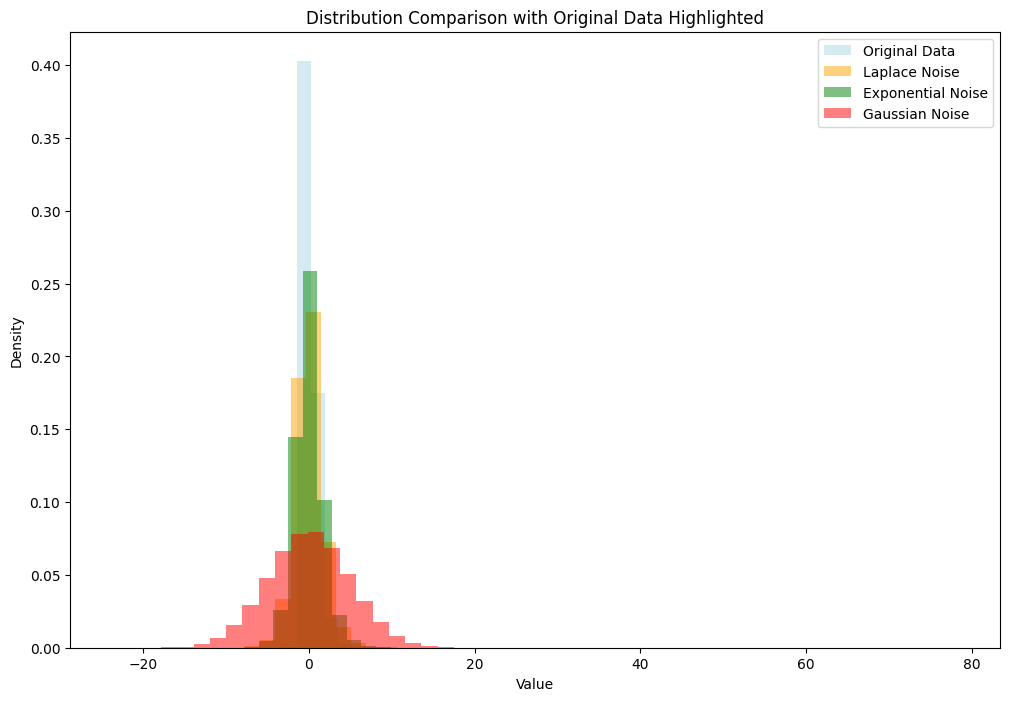

Laplace Noise - KS Statistic: 0.18985574811661768, p-value: 0.0, Wasserstein Distance: 0.5650369026952021, KL Divergence: 0.13579339521591133
Exponential Noise - KS Statistic: 0.19017195365021453, p-value: 0.0, Wasserstein Distance: 0.6727503095799148, KL Divergence: 0.12362114827205317
Gaussian Noise - KS Statistic: 0.3917570352352961, p-value: 0.0, Wasserstein Distance: 3.3332907394082754, KL Divergence: 1.2023769711082575


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.stats import ks_2samp, entropy

# Placeholder noise functions
def add_laplace_noise(data, epsilon, sensitivity=1):
    noise = np.random.laplace(0, sensitivity / epsilon, size=data.shape)
    return data + noise

def add_gaussian_noise(data, epsilon, delta=1e-5, sensitivity=1):
    sigma = np.sqrt(2 * np.log(1.25 / delta)) * sensitivity / epsilon
    noise = np.random.normal(0, sigma, size=data.shape)
    return data + noise

def add_exponential_noise(data, epsilon, sensitivity=1):
    scale = sensitivity / epsilon
    noise = np.random.exponential(scale, size=data.shape)
    # 随机符号以保持分布对称性
    return data + np.random.choice([-1, 1], size=data.shape) * noise

# Function to calculate CDF
def calculate_cdf(data, bins):
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    cdf = np.cumsum(hist * np.diff(bin_edges))
    return cdf, bin_edges[:-1]  # Bin edges align with CDF

# Function to calculate Wasserstein Distance (approx via hist)
def wasserstein_distance_manual(data1, data2, num_bins=100):
    all_data = np.hstack((data1, data2))
    bins = np.linspace(np.min(all_data), np.max(all_data), num_bins)
    cdf1, _ = calculate_cdf(data1, bins)
    cdf2, _ = calculate_cdf(data2, bins)
    bin_widths = np.diff(bins)
    return np.sum(np.abs(cdf1 - cdf2) * bin_widths)

# Compute KL Divergence using histograms to get PMFs
def compute_kl_divergence(sample1, sample2, num_bins=50):
    combined_data = np.hstack((sample1, sample2))
    bins = np.linspace(np.min(combined_data), np.max(combined_data), num_bins + 1)

    hist1, _ = np.histogram(sample1, bins=bins, density=False)
    hist2, _ = np.histogram(sample2, bins=bins, density=False)

    # Add small constant to avoid division by zero or log(0)
    eps = 1e-12
    pmf1 = (hist1 + eps) / (np.sum(hist1) + eps * len(hist1))
    pmf2 = (hist2 + eps) / (np.sum(hist2) + eps * len(hist2))

    return entropy(pmf1, pmf2)

# 示例数据加载与标准化（用户需自行提供 X_train_raw, X_test_raw）
# X_train_raw, X_test_raw = ... # 用户数据加载部分

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_raw)
X_test_standardized = scaler.transform(X_test_raw)

# Add noise to training and testing data
noisy_data_laplace_train = add_laplace_noise(X_train_standardized, epsilon=1).flatten()
noisy_data_exponential_train = add_exponential_noise(X_train_standardized, epsilon=1).flatten()
noisy_data_gaussian_train = add_gaussian_noise(X_train_standardized, epsilon=1).flatten()

noisy_data_laplace_test = add_laplace_noise(X_test_standardized, epsilon=1).flatten()
noisy_data_exponential_test = add_exponential_noise(X_test_standardized, epsilon=1).flatten()
noisy_data_gaussian_test = add_gaussian_noise(X_test_standardized, epsilon=1).flatten()

# Combine training and testing data
original_data_combined = np.hstack((X_train_standardized.flatten(), X_test_standardized.flatten()))
noisy_data_laplace_combined = np.hstack((noisy_data_laplace_train, noisy_data_laplace_test))
noisy_data_exponential_combined = np.hstack((noisy_data_exponential_train, noisy_data_exponential_test))
noisy_data_gaussian_combined = np.hstack((noisy_data_gaussian_train, noisy_data_gaussian_test))

# Match sample sizes
target_size = min(len(original_data_combined), len(noisy_data_laplace_combined))
original_data_sampled = np.random.choice(original_data_combined, size=target_size, replace=False)
noisy_data_laplace_sampled = np.random.choice(noisy_data_laplace_combined, size=target_size, replace=False)
noisy_data_exponential_sampled = np.random.choice(noisy_data_exponential_combined, size=target_size, replace=False)
noisy_data_gaussian_sampled = np.random.choice(noisy_data_gaussian_combined, size=target_size, replace=False)

# Calculate Wasserstein Distances
w_distance_lap = wasserstein_distance_manual(original_data_sampled, noisy_data_laplace_sampled)
w_distance_exp = wasserstein_distance_manual(original_data_sampled, noisy_data_exponential_sampled)
w_distance_gauss = wasserstein_distance_manual(original_data_sampled, noisy_data_gaussian_sampled)

# Perform statistical tests
ks_stat_lap, p_value_lap = ks_2samp(original_data_sampled, noisy_data_laplace_sampled)
ks_stat_exp, p_value_exp = ks_2samp(original_data_sampled, noisy_data_exponential_sampled)
ks_stat_gauss, p_value_gauss = ks_2samp(original_data_sampled, noisy_data_gaussian_sampled)

# Compute KL Divergences using corrected method
kl_div_lap = compute_kl_divergence(original_data_sampled, noisy_data_laplace_sampled)
kl_div_exp = compute_kl_divergence(original_data_sampled, noisy_data_exponential_sampled)
kl_div_gauss = compute_kl_divergence(original_data_sampled, noisy_data_gaussian_sampled)

# Visualization
plt.figure(figsize=(12, 8))
plt.hist(original_data_sampled, bins=50, alpha=0.5, label='Original Data', color='lightblue', density=True)
plt.hist(noisy_data_laplace_sampled, bins=50, alpha=0.5, label='Laplace Noise', color='orange', density=True)
plt.hist(noisy_data_exponential_sampled, bins=50, alpha=0.5, label='Exponential Noise', color='green', density=True)
plt.hist(noisy_data_gaussian_sampled, bins=50, alpha=0.5, label='Gaussian Noise', color='red', density=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution Comparison with Original Data Highlighted')
plt.show()

# Print Results
print(f"Laplace Noise - KS Statistic: {ks_stat_lap}, p-value: {p_value_lap}, "
      f"Wasserstein Distance: {w_distance_lap}, KL Divergence: {kl_div_lap}")
print(f"Exponential Noise - KS Statistic: {ks_stat_exp}, p-value: {p_value_exp}, "
      f"Wasserstein Distance: {w_distance_exp}, KL Divergence: {kl_div_exp}")
print(f"Gaussian Noise - KS Statistic: {ks_stat_gauss}, p-value: {p_value_gauss}, "
      f"Wasserstein Distance: {w_distance_gauss}, KL Divergence: {kl_div_gauss}")


In [ ]:
# Assume a baseline Wasserstein Distance as a threshold of significant change
baseline_distance = np.max([w_distance_lap, w_distance_exp, w_distance_gauss])  # As an example

# Calculate preservation rate as a percentage
preservation_rate_lap = ((baseline_distance - w_distance_lap) / baseline_distance) * 100
preservation_rate_exp = ((baseline_distance - w_distance_exp) / baseline_distance) * 100
preservation_rate_gauss = ((baseline_distance - w_distance_gauss) / baseline_distance) * 100
print(f"Laplace Noise Preservation Rate: {preservation_rate_lap:.2f}%")
print(f"Exponential Noise Preservation Rate: {preservation_rate_exp:.2f}%")
print(f"Gaussian Noise Preservation Rate: {preservation_rate_gauss:.2f}%")

Laplace Noise Preservation Rate: 83.05%
Exponential Noise Preservation Rate: 79.82%
Gaussian Noise Preservation Rate: 0.00%


In [ ]:
# Convert KS statistic to a preservation index (inverse since lower KS is better)
preservation_index_ks_lap = (1 - ks_stat_lap) * 100
preservation_index_ks_exp = (1 - ks_stat_exp) * 100
preservation_index_ks_gauss = (1 - ks_stat_gauss) * 100
print(f"Laplace Noise Preservation Index (KS): {preservation_index_ks_lap:.2f}%")
print(f"Exponential Noise Preservation Index (KS): {preservation_index_ks_exp:.2f}%")
print(f"Gaussian Noise Preservation Index (KS): {preservation_index_ks_gauss:.2f}%")

Laplace Noise Preservation Index (KS): 81.01%
Exponential Noise Preservation Index (KS): 80.98%
Gaussian Noise Preservation Index (KS): 60.82%
